# SQL Data Analysis – Fintech Transactions

This project demonstrates SQL queries and data analysis on a synthetic database of fintech transactions. Using SQLite and Python (pandas, seaborn, matplotlib), we explore transaction categories, customer behavior, and daily transaction patterns.

The analysis includes:
- Querying total transaction amounts by category
- Identifying top 5 customers by average transaction amount
- Analyzing daily transaction totals over time with visualization

## Database Creation

We generate a synthetic SQLite database with 200 transaction records. Each transaction includes:
- `transaction_id`: unique ID
- `customer_id`: random customer identifier
- `amount`: transaction amount in dollars
- `transaction_date`: transaction date over a 200-day range
- `category`: transaction type (deposit, withdrawal, payment, refund)

This dataset is saved into `transactions.db` and used for analysis.


In [36]:
import sqlite3
import pandas as pd
import numpy as np

np.random.seed(42)

num_rows = 200

transactions = pd.DataFrame({
    'transaction_id': range(1, num_rows + 1),
    'customer_id': np.random.randint(1000, 1100, num_rows),
    'amount': np.round(np.random.uniform(10, 1000, num_rows), 2),
    'transaction_date': pd.date_range(start='2023-01-01', periods=num_rows).astype(str),
    'category': np.random.choice(['deposit', 'withdrawal', 'payment', 'refund'], num_rows)
})

# Save to database
conn = sqlite3.connect('/Users/asus/Documents/Github Portfolio/SQL_Data_Analysis_FT_Transactions/:data/transactions.db')
transactions.to_sql('transactions', conn, index=False, if_exists='replace')
conn.close()

print("Database created with transaction_date!")



Database created with transaction_date!


In [38]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Connect to database
conn = sqlite3.connect('/Users/asus/Documents/Github Portfolio/SQL_Data_Analysis_FT_Transactions/:data/transactions.db')



## Query 1: Total Transaction Amount by Category

We calculate the total transaction amount for each transaction category using SQL. This helps us understand which transaction types (e.g., deposits, payments) contribute the most in monetary terms.





In [41]:
# Total amount per category
query1 = """
SELECT category, SUM(amount) AS total_amount
FROM transactions
GROUP BY category
ORDER BY total_amount DESC
"""
df1 = pd.read_sql_query(query1, conn)

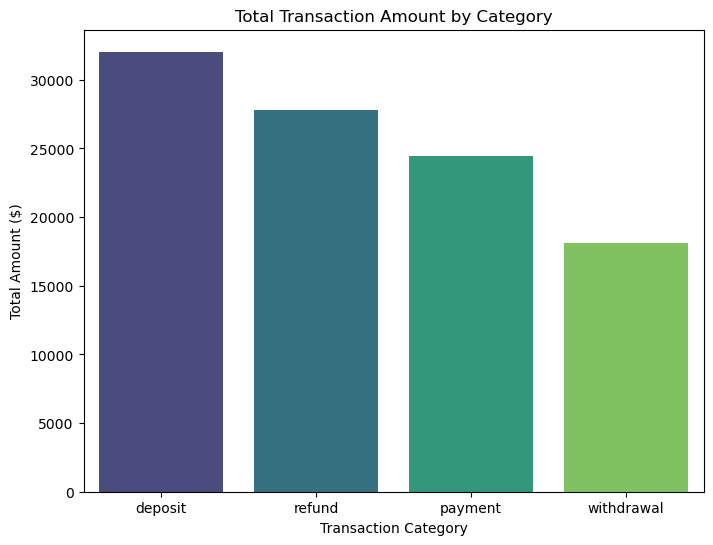

In [43]:
# PLOT 1: Total amount per category
plt.figure(figsize=(8,6))
sns.barplot(data=df1, x='category', y='total_amount', hue='category', palette='viridis', legend=False)
plt.title('Total Transaction Amount by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Total Amount ($)')
plt.show()

## Query 2: Top 5 Customers by Average Transaction Amount

We identify the top 5 customers with the highest average transaction amounts. This provides insight into high-value customers.


In [46]:
#  Average transaction per top 5 customers
query2 = """
SELECT customer_id, AVG(amount) AS avg_amount
FROM transactions
GROUP BY customer_id
ORDER BY avg_amount DESC
LIMIT 5
"""
df2 = pd.read_sql_query(query2, conn)

### Display: Top 5 Customers Table

We print the top 5 customers and their average transaction amounts.


In [49]:
# Print Top 5 Customers
print("\nTop 5 Customers by Average Transaction Amount:")
print(df2)


Top 5 Customers by Average Transaction Amount:
   customer_id  avg_amount
0         1065     976.090
1         1060     943.480
2         1072     937.075
3         1080     927.605
4         1079     905.115


## Query 3: Daily Transaction Totals

We calculate the total transaction amount for each day in the dataset. This will allow us to visualize transaction trends over time.


In [52]:
# Daily transaction totals
query3 = """
SELECT transaction_date, SUM(amount) AS daily_total
FROM transactions
GROUP BY transaction_date
ORDER BY transaction_date
"""
df3 = pd.read_sql_query(query3, conn)

conn.close()

### Visualization: Daily Transaction Totals Over Time

We plot daily transaction totals using a line chart to show trends and fluctuations across the time period.


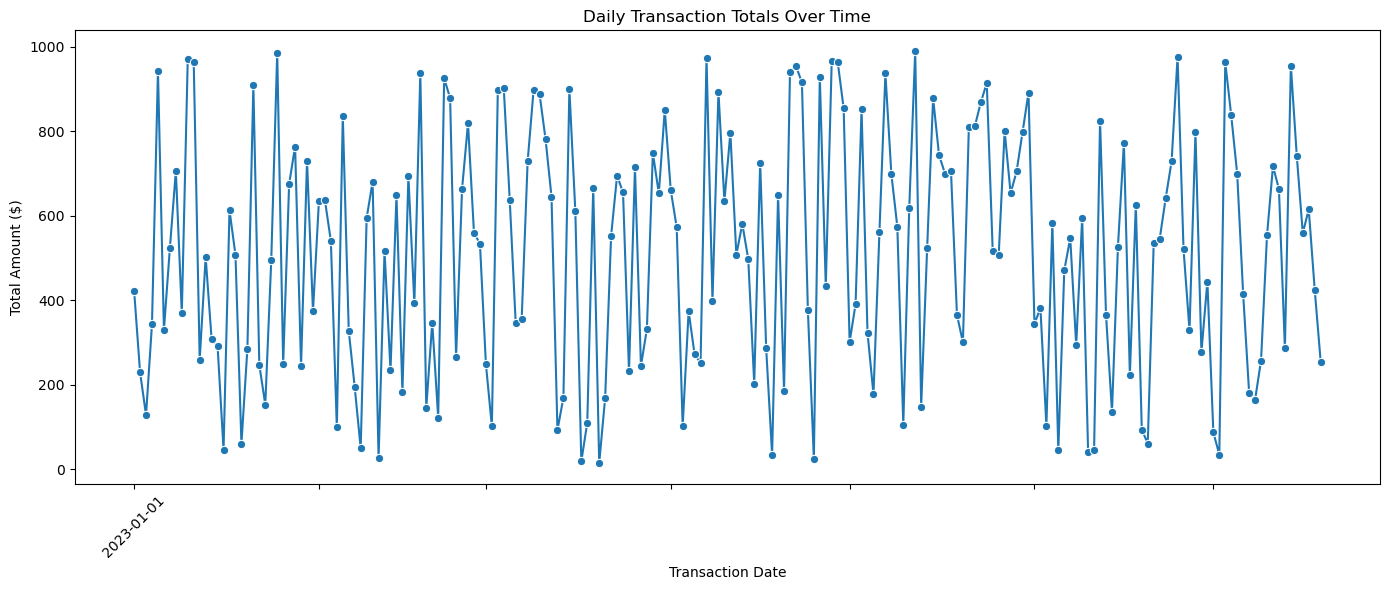

In [31]:
# PLOT 2: Daily transaction totals (cleaned & spacious)
df3['transaction_date'] = pd.to_datetime(df3['transaction_date'])
df3 = df3.sort_values('transaction_date')

plt.figure(figsize=(14,6))
sns.lineplot(data=df3, x='transaction_date', y='daily_total', marker='o')
plt.title('Daily Transaction Totals Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)


# Format dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Reduce x-tick labels to avoid clutter
every_nth = max(1, len(df3)//15)
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.tight_layout()
plt.show()